<a href="https://colab.research.google.com/github/namana-udupa/IUBH_assignment_Python/blob/develop/Lead_Time_Forecasting_Food__Delivery_BusinessV1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')
# Access a file in Google Drive
data =pd.read_csv('/content/drive/My Drive/deliverytime.txt')

Mounted at /content/drive


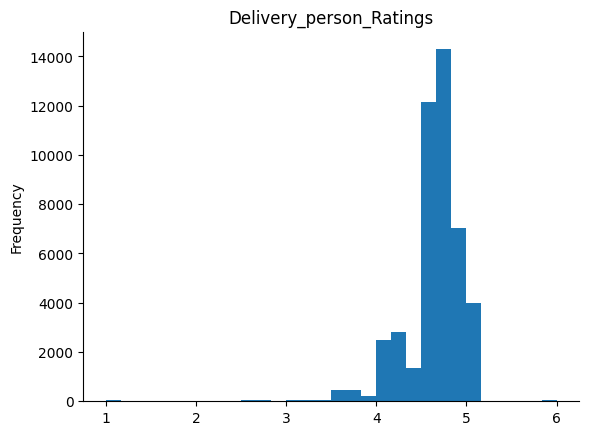

In [ ]:
# pattern for  Delivery_person_Ratings
data['Delivery_person_Ratings'].plot(kind='hist', bins=30, title='Delivery_person_Ratings')
plt.gca().spines[['top']].set_visible(False)
plt.gca().spines[['right',]].set_visible(False)
#Insight - Higher the Rating of the person, more delivery frequency or vice versa

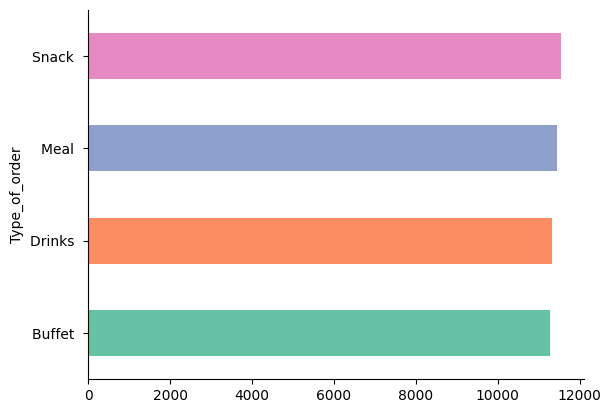

In [ ]:
# A pattern on Type of order -

data.groupby('Type_of_order').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set2'))
plt.gca().spines[['top']].set_visible(False)
plt.gca().spines[['right',]].set_visible(False)
#Insight- There is no variation particularly based on the type of order hence this may not add much value in the delivery time forecast

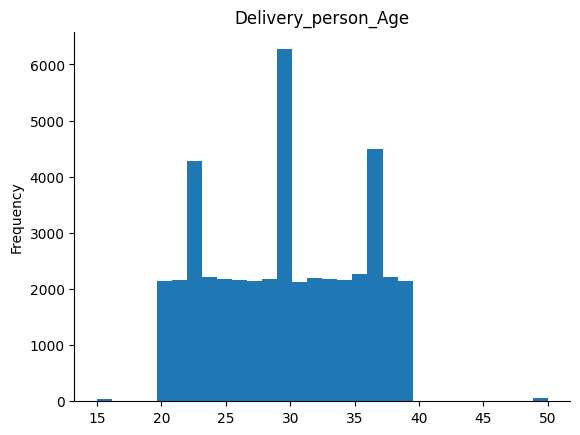

In [ ]:
data['Delivery_person_Age'].plot(kind='hist', bins=30, title='Delivery_person_Age')
plt.gca().spines[['top']].set_visible(False)
plt.gca().spines[['right',]].set_visible(False)
#Insight: Mostly the delivery persons's age between 20 to 40  and peaks around 30 , 22 , 38 and might be a good variable to add in forecasting

In [ ]:
data['Delivery_person_Age'].value_counts()

29    4045
35    2262
36    2260
37    2227
30    2226
38    2219
24    2210
32    2202
22    2196
33    2187
28    2179
25    2174
34    2166
26    2159
21    2153
27    2150
39    2144
20    2136
31    2120
23    2087
50      53
15      38
Name: Delivery_person_Age, dtype: int64

In [ ]:

s=data.groupby('Delivery_person_Age')['Time_taken(min)'].mean()

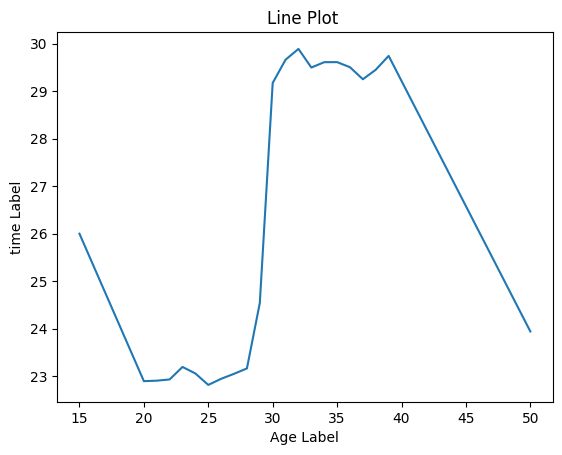

In [ ]:
# Plotting the Series as a line plot
s.plot(kind='line')

# Adding labels and title
plt.xlabel('Age Label')
plt.ylabel('time Label')
plt.title('Line Plot ')
# Display the plot
plt.show()

#Insight : with increasing age, increases delivery time in between 20 to 40

In [ ]:
s1=data['Type_of_vehicle'].value_counts()

In [ ]:
s1.head()

motorcycle           26435
scooter              15276
electric_scooter      3814
bicycle                 68
Name: Type_of_vehicle, dtype: int64

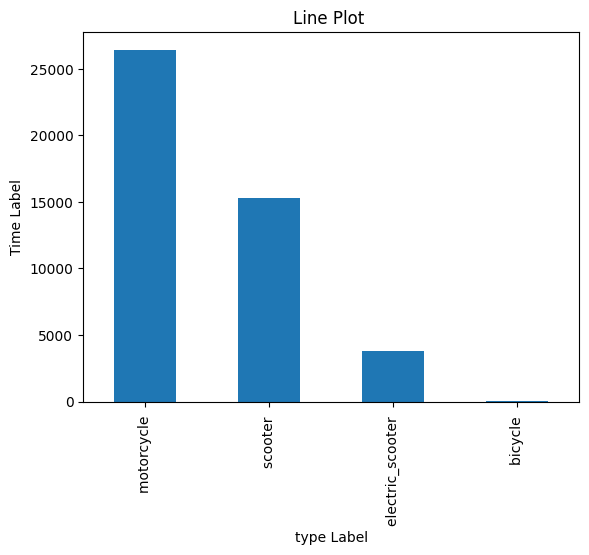

In [ ]:
# Plotting the Series as a line plot
s1.plot(kind='bar')

# Adding labels and title
plt.xlabel('type Label')
plt.ylabel('Time Label')
plt.title('Line Plot ')
# Display the plot
plt.show()

#Insight : with increasing age, increases delivery time in between 20 to 40

In [ ]:
data.count()

ID                             45593
Delivery_person_ID             45593
Delivery_person_Age            45593
Delivery_person_Ratings        45593
Restaurant_latitude            45593
Restaurant_longitude           45593
Delivery_location_latitude     45593
Delivery_location_longitude    45593
Type_of_order                  45593
Type_of_vehicle                45593
Time_taken(min)                45593
dtype: int64

In [ ]:
#Get the distance between restaurant and Delivery Location
from geopy.distance import geodesic

for i in range (0,45593):
    distance = geodesic(((data.at[i,"Restaurant_latitude"]),(data.at[i,"Restaurant_longitude"])), ((data.at[i,"Delivery_location_latitude"]),(data.at[i,"Delivery_location_longitude"]))).m
    data.at[0+i,"distance"] = distance
data['speed'] = data['distance'] / data['Time_taken(min)']

<Axes: xlabel='Delivery_person_Age', ylabel='distance'>

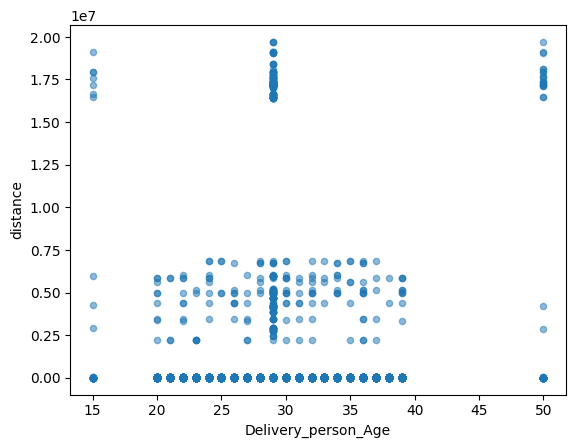

In [ ]:
data.plot.scatter(x='Delivery_person_Age', y='distance', alpha=0.5)

#Anything beyond 1K km is unrealistic so get rid of it


In [ ]:
data = data.drop(data[data['distance']>= 100000].index)

In [ ]:
import plotly.express as px
fig = px.box(data,
             x="speed",
             y="Type_of_vehicle",
             color="Delivery_person_Age"
           )
fig.show()

In [ ]:
fig = px.box(data,
             x="Delivery_person_Ratings",
             y="speed",
           )
fig.show()
#Insight: Speed is high when rhe ratings are high

In [ ]:
#Based on the above analysis, Delivery_person_ID and Type_of_order are not relevant, hence dropping them
data = data.drop(['ID', 'Delivery_person_ID', 'Type_of_order'], axis=1)

In [ ]:
data.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),distance,speed
count,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000,45162.000000
mean,29.540012,4.632691,17.373889,70.715111,17.437500,70.778722,26.298038,9718.912269,396.742142
std,5.692706,0.322902,7.340394,21.203905,7.341762,21.204109,9.383733,5599.114421,263.153356
min,15.000000,1.000000,0.000000,0.000000,0.010000,0.010000,10.000000,1463.837106,28.230889
25%,25.000000,4.500000,12.934179,73.170283,12.985662,73.277753,19.000000,4654.105041,208.308864
50%,29.000000,4.700000,18.554382,75.898497,18.631440,75.999490,26.000000,9203.900929,341.704203
75%,34.000000,4.800000,22.732225,78.045359,22.783659,78.101455,32.000000,13660.195165,518.293518
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000,20942.906277,2082.946033


In [ ]:
X = data[["Delivery_person_Age","Delivery_person_Ratings","distance","speed"]]
y = data["Time_taken(min)"]

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8, random_state=123)

In [ ]:
y_test

36885    27
17738    48
32580    33
36292    19
43410    25
         ..
14569    19
40423    29
40573    10
7760     43
31903    37
Name: Time_taken(min), Length: 9033, dtype: int64

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create and fit RandomForestRegressor model
model = RandomForestClassifier(n_estimators=5,criterion='gini',random_state=1)
predtest=model.fit(X,y)

# Forecast
forecast_values = model.predict(X_test)


In [ ]:

gini_values = model.feature_importances_
gini_values

array([0.05730782, 0.04595581, 0.26004702, 0.63668935])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, forecast_values)

0.9885973652164286

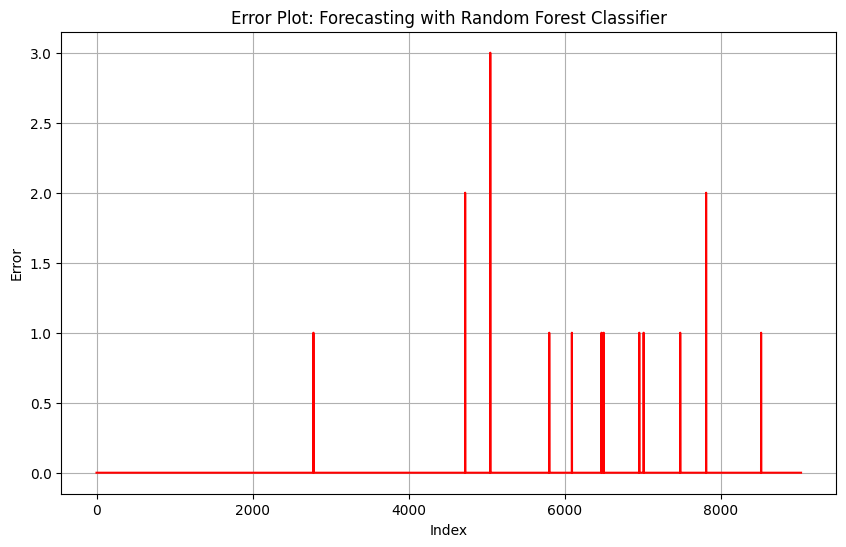

In [ ]:
# Calculating the errors
errors = np.abs(y_test - forecast_values)

# Plotting the Error Plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test)), errors, color='red')
plt.xlabel('Index')
plt.ylabel('Error')
plt.title('Error Plot: Forecasting with Random Forest Classifier')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Generating confusion matrix
conf_matrix = confusion_matrix(y_test, forecast_values)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[148   0   0 ...   0   0   0]
 [  0 150   0 ...   0   0   0]
 [  0   0 148 ...   0   0   0]
 ...
 [  0   0   0 ...  16   0   0]
 [  0   0   0 ...   0  20   0]
 [  0   0   0 ...   0   1  17]]
